<a href="https://colab.research.google.com/github/ecemkocaslan/MultiChannelSleepNet/blob/main/seqsleepnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import os

# Change the path if your files were saved elsewhere
os.listdir('/content/drive/MyDrive/sleep-edf-telemetry')


['ST7212JJ-Hypnogram.edf',
 'ST7062JR-Hypnogram.edf',
 'ST7012JP-Hypnogram.edf',
 'ST7081JW-Hypnogram.edf',
 'ST7112JE-Hypnogram.edf',
 'ST7071JA-Hypnogram.edf',
 'ST7051JA-Hypnogram.edf',
 'ST7131JR-Hypnogram.edf',
 'ST7111JE-Hypnogram.edf',
 'ST7052J0-PSG.edf',
 'ST7162JM-Hypnogram.edf',
 'ST7241JO-Hypnogram.edf',
 'ST7111J0-PSG.edf',
 'ST7012J0-PSG.edf',
 'ST7211JJ-Hypnogram.edf',
 'ST7221J0-PSG.edf',
 'ST7222J0-PSG.edf',
 'ST7242JO-Hypnogram.edf',
 'ST7201JO-Hypnogram.edf',
 'ST7061J0-PSG.edf',
 'ST7131J0-PSG.edf',
 'ST7011JP-Hypnogram.edf',
 'ST7212J0-PSG.edf',
 'ST7052JA-Hypnogram.edf',
 'ST7121JE-Hypnogram.edf',
 'ST7142JE-Hypnogram.edf',
 'ST7151J0-PSG.edf',
 'ST7062J0-PSG.edf',
 'ST7082J0-PSG.edf',
 'ST7142J0-PSG.edf',
 'ST7202J0-PSG.edf',
 'ST7072JA-Hypnogram.edf',
 'ST7021JM-Hypnogram.edf',
 'ST7241J0-PSG.edf',
 'ST7201J0-PSG.edf',
 'ST7161J0-PSG.edf',
 'ST7141J0-PSG.edf',
 'ST7011J0-PSG.edf',
 'ST7141JE-Hypnogram.edf',
 'ST7061JR-Hypnogram.edf',
 'ST7211J0-PSG.edf',
 'ST713

In [15]:
!mkdir -p /content/drive/MyDrive/sleep-edf-telemetry


In [18]:
!wget -r -np -nH --cut-dirs=5 -A "*PSG.edf,*Hypnogram.edf" \
https://physionet.org/files/sleep-edfx/1.0.0/sleep-telemetry/ \
-P /content/drive/MyDrive/sleep-edf-telemetry/


--2025-04-19 11:59:24--  https://physionet.org/files/sleep-edfx/1.0.0/sleep-telemetry/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/MyDrive/sleep-edf-telemetry/index.html.tmp’

index.html.tmp          [ <=>                ]  10.90K  --.-KB/s    in 0.002s  

2025-04-19 11:59:25 (6.28 MB/s) - ‘/content/drive/MyDrive/sleep-edf-telemetry/index.html.tmp’ saved [11165]

Loading robots.txt; please ignore errors.
--2025-04-19 11:59:25--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘/content/drive/MyDrive/sleep-edf-telemetry/robots.txt.tmp’

robots.txt.tmp      100%[===================>]      22  --.-KB/s    in 0s      

2025-04-19 11:59:25 (3.93 MB/s) - ‘/content/drive/MyDrive/sleep-edf-

In [4]:
from glob import glob
edf_files = sorted(glob("/content/drive/MyDrive/sleep-edf-telemetry/*PSG.edf"))
hypnogram_files = sorted(glob("/content/drive/MyDrive/sleep-edf-telemetry/*Hypnogram.edf"))

print("PSG files:", len(edf_files))
print("Hypnogram files:", len(hypnogram_files))


PSG files: 44
Hypnogram files: 44


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:27: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(mne.read_annotations(hyp_path))
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:27: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(mne.read_annotations(hyp_path))
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:27: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(mne.read_annotations(hyp_path))
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:27: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(mne.read_annotations(hyp_path))
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:27: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(mne.read_annotations(hyp_path))
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.


<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-17-6e691d036670>:26: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sampling frequency of the instance is already 100.0, returning unmodified.
✅ EEG shape: (6026, 30, 100) Labels: (6026,)
📌 Unique subjects: 44


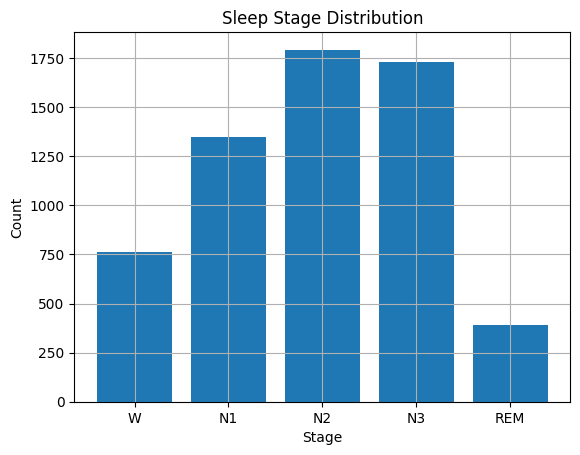

In [17]:
from glob import glob
import mne
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# File paths (update if needed)
edf_files = sorted(glob("/content/drive/MyDrive/sleep-edf-telemetry/*PSG.edf"))
hypnogram_files = sorted(glob("/content/drive/MyDrive/sleep-edf-telemetry/*Hypnogram.edf"))

# Sleep stage mapping
stage_mapping = {
    "Sleep stage W": 0, "Sleep stage 1": 1, "Sleep stage 2": 2,
    "Sleep stage 3": 3, "Sleep stage 4": 3, "Sleep stage R": 4
}

# Containers
all_epochs = []
all_labels = []
subject_per_epoch = []  # ✅ NEW: tracks subject ID per epoch

for psg_path, hyp_path in zip(edf_files, hypnogram_files):
    try:
        subject_id = psg_path.split("/")[-1].split("-")[0]

        raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
        raw.set_annotations(mne.read_annotations(hyp_path))

        eeg_channels = [ch for ch in raw.ch_names if "Fpz-Cz" in ch or "EEG Fpz-Cz" in ch]
        if not eeg_channels:
            print(f"⚠️ Skipping {subject_id} — no Fpz-Cz channel found")
            continue

        raw.pick_channels(eeg_channels)
        raw.resample(100)

        eeg = raw.get_data()[0]
        sfreq = raw.info['sfreq']
        epoch_samples = int(30 * sfreq)

        for ann in raw.annotations:
            label = stage_mapping.get(ann["description"])
            if label is None:
                continue

            start = int(ann["onset"] * sfreq)
            stop = start + epoch_samples
            if stop > len(eeg):
                continue

            segment = eeg[start:stop]
            frames = [segment[i:i+100] for i in range(0, epoch_samples, 100)]
            if len(frames) == 30:
                all_epochs.append(frames)
                all_labels.append(label)
                subject_per_epoch.append(subject_id)  # ✅ Save subject per epoch

    except Exception as e:
        print(f"❌ Error with {psg_path}: {e}")
        continue

# Convert to arrays
X = np.array(all_epochs)
y = np.array(all_labels)
subject_per_epoch = np.array(subject_per_epoch)

# Save to disk
np.save("X_sleepedf.npy", X)
np.save("y_sleepedf.npy", y)
np.save("subject_ids.npy", subject_per_epoch)

# Quick check
print("✅ EEG shape:", X.shape, "Labels:", y.shape)
print("📌 Unique subjects:", len(set(subject_per_epoch)))

# Plot class distribution
label_names = ['W', 'N1', 'N2', 'N3', 'REM']
label_counts = Counter(y)
plt.bar(label_names, [label_counts.get(i, 0) for i in range(5)])
plt.title("Sleep Stage Distribution")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [18]:
# Load preprocessed data
X = np.load("X_sleepedf.npy", mmap_mode='r')
y = np.load("y_sleepedf.npy", mmap_mode='r')
subject_per_epoch = np.load("subject_ids.npy", allow_pickle=True)

# Subject-wise train-test split
from sklearn.model_selection import train_test_split

unique_subjects = sorted(list(set(subject_per_epoch)))
train_subs, val_subs = train_test_split(unique_subjects, test_size=0.2, random_state=42)

train_idx = [i for i, sid in enumerate(subject_per_epoch) if sid in train_subs]
val_idx = [i for i, sid in enumerate(subject_per_epoch) if sid in val_subs]

print("✅ Train epochs:", len(train_idx))
print("✅ Val epochs:", len(val_idx))


✅ Train epochs: 4896
✅ Val epochs: 1130


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load memory-mapped EEG data
X = np.load("/content/drive/MyDrive/sleep-edf-telemetry/X_sleepedf.npy", mmap_mode='r')
y = np.load("/content/drive/MyDrive/sleep-edf-telemetry/y_sleepedf.npy", mmap_mode='r')

from sklearn.model_selection import train_test_split

# Create train/val subject ID lists
unique_subjects = sorted(list(set(subject_ids)))
train_subs, val_subs = train_test_split(unique_subjects, test_size=0.2, random_state=42)

print("🧪 Train subjects:", len(train_subs))
print("🔬 Val subjects:", len(val_subs))



🧪 Train subjects: 35
🔬 Val subjects: 9


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


class SequenceGenerator(tf.keras.utils.Sequence):
    def __init__(self, X, y, indices, batch_size=2, seq_len=20):
        self.X = X
        self.y = y
        self.indices = indices
        self.batch_size = batch_size
        self.seq_len = seq_len
        self.valid_starts = [i for i in self.indices if i + seq_len <= len(X)]

    def __len__(self):
        return int(np.ceil(len(self.valid_starts) / self.batch_size))

    def __getitem__(self, idx):
        batch_starts = self.valid_starts[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = np.array([self.X[i:i+self.seq_len] for i in batch_starts])
        batch_y = np.array([self.y[i:i+self.seq_len] for i in batch_starts], dtype=np.int32)
        return batch_x, batch_y



In [19]:
seq_len = 20
batch_size = 2

train_gen = SequenceGenerator(X, y, train_idx, batch_size=batch_size, seq_len=seq_len)
val_gen = SequenceGenerator(X, y, val_idx, batch_size=batch_size, seq_len=seq_len)



In [20]:
from tensorflow.keras import layers, models

def build_seqsleepnet(input_shape=(20, 30, 100), num_classes=5, hidden_units=128):
    # Frame-level encoder block (CNN → MaxPool → Flatten)
    def frame_encoder():
        input_frame = tf.keras.Input(shape=(30, 100))
        x = layers.Conv1D(64, kernel_size=5, activation='relu', padding='same')(input_frame)
        x = layers.MaxPooling1D(pool_size=2)(x)
        x = layers.Flatten()(x)
        return models.Model(inputs=input_frame, outputs=x)

    frame_model = frame_encoder()

    # Input shape: (epochs, frames, features)
    input_layer = tf.keras.Input(shape=input_shape)

    # Apply frame encoder to each epoch (i.e. 30 frames)
    x = layers.TimeDistributed(frame_model)(input_layer)

    # Epoch-level BiLSTM
    x = layers.Bidirectional(layers.LSTM(hidden_units, return_sequences=True))(x)
    x = layers.Dropout(0.3)(x)

    # Sequence-level BiLSTM
    x = layers.Bidirectional(layers.LSTM(hidden_units, return_sequences=True))(x)

    # Per-epoch softmax classification
    output = layers.TimeDistributed(layers.Dense(num_classes, activation='softmax'))(x)

    return models.Model(inputs=input_layer, outputs=output)


In [21]:
model = build_seqsleepnet(input_shape=(seq_len, 30, 100))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=10)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2439/2439 ━━━━━━━━━━━━━━━━━━━━ 557s 222ms/step - accuracy: 0.2995 - loss: 1.4980 - val_accuracy: 0.4687 - val_loss: 1.2625
Epoch 2/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 507s 208ms/step - accuracy: 0.4794 - loss: 1.2334 - val_accuracy: 0.5409 - val_loss: 1.1110
Epoch 3/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 499s 205ms/step - accuracy: 0.5439 - loss: 1.0948 - val_accuracy: 0.5447 - val_loss: 1.1348
Epoch 4/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 505s 206ms/step - accuracy: 0.6373 - loss: 0.8985 - val_accuracy: 0.5353 - val_loss: 1.2349
Epoch 5/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 499s 205ms/step - accuracy: 0.7564 - loss: 0.6329 - val_accuracy: 0.5285 - val_loss: 1.4406
Epoch 6/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 519s 213ms/step - accuracy: 0.8364 - loss: 0.4432 - val_accuracy: 0.5318 - val_loss: 1.5968
Epoch 7/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 507s 208ms/step - accuracy: 0.8965 - loss: 0.2928 - val_accuracy: 0.5207 - val_loss: 1.8659
Epoch 8/10
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 508s 208ms/step - accuracy: 0.9

In [36]:
x_batch, y_batch = train_gen[0]
print("Input shape:", x_batch.shape)
print("Label shape:", y_batch.shape)


Input shape: (2, 20, 30, 100)
Label shape: (2, 20)


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, f1_score
import numpy as np

# Predict class probabilities
y_probs = model.predict(X_val)
y_pred = np.argmax(y_probs, axis=-1)

# Flatten if needed
y_true = y_val.flatten()
y_pred_flat = y_pred.flatten()

# Compute metrics
print("📊 Classification Report:")
print(classification_report(y_true, y_pred_flat))

print("Cohen’s Kappa:", cohen_kappa_score(y_true, y_pred_flat))
print("Macro F1 Score:", f1_score(y_true, y_pred_flat, average='macro'))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.35      0.13        60
           1       0.25      0.01      0.01       131
           2       0.00      0.00      0.00       188
           3       0.23      0.24      0.23       168
           4       0.12      0.34      0.18        53

    accuracy                           0.13       600
   macro avg       0.14      0.19      0.11       600
weighted avg       0.14      0.13      0.10       600

Cohen’s Kappa: -0.020915682835527916
Macro F1 Score: 0.11096262477309131
Confusion Matrix:
[[21  0  0 24 15]
 [71  1  0 39 20]
 [90  1  0 54 43]
 [80  0  0 40 48]
 [13  2  0 20 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
